In [2]:
import pandas as pd 
import numpy as np 
import nltk

In [123]:
!pip install wordcloud 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aujas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aujas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aujas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Datasets Link: github.com/skathirmani/datasets

- Narendra Modi Tweets (narendramodi_tweets.csv)
- Amazon Reviews (amazon_reviews.csv)
- IMDB Sentiment Data (imdb_sentiment.csv) 
- Hotstar reviews Data(hotstar.allreviews_Sentiment.csv)
    

In [2]:
tweets = pd.read_csv('narendramodi_tweets.csv')

In [3]:
tweets.shape

(3220, 14)

In [4]:
tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


## Bag of words Analysis

What is the freqeuncy of each unique word in bag of word analysis 

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

text= 'i love india i love bikes'
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)

In [128]:
x = ['a','c','d']
''.join(x)

'acd'

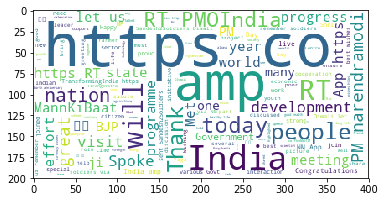

In [129]:
text = ' '.join(tweets['text'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)

#Impt words are highlights 

In [130]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [131]:
len(stopwords)

179

In [132]:
custom_stopwords = ['RT','amp','https']

In [133]:
x = [1,2,3]
y = [4,5,6]
x.extend(y)

In [134]:
x

[1, 2, 3, 4, 5, 6]

In [135]:
stopwords.extend(custom_stopwords)

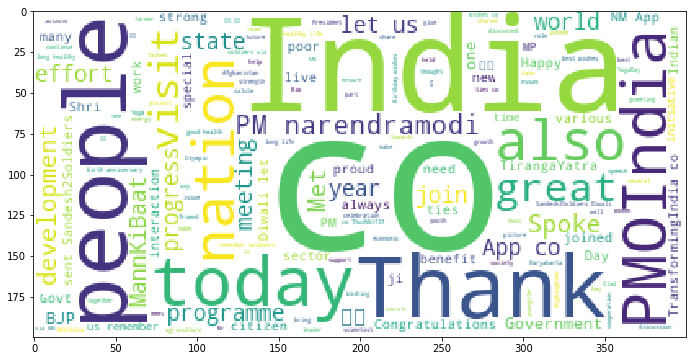

In [136]:
plt.figure(figsize=(12,6))
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

Online Word Cloud API : https://www.wordclouds.com/

## Text Cleaning 

- Converting every character to lower case 
- Remove Special characters and junk values 
- Remove stopwords 
- Indentify root of the words (stemming, lemmatization)

In [137]:
docs = tweets['text'].str.lower()


In [138]:
text = pd.Series(['This sentance has numbers 123',
                 'this sentence has special characters &^%#'])
text.str.replace('[a-z]','-')

0                T--- -------- --- ------- 123
1    ---- -------- --- ------- ---------- &^%#
dtype: object

In [139]:
text.str.replace('[a-zA-Z]','-')

0                ---- -------- --- ------- 123
1    ---- -------- --- ------- ---------- &^%#
dtype: object

In [140]:
text.str.replace('[0-9]','') #Remove the numbers from the data 

0                   This sentance has numbers 
1    this sentence has special characters &^%#
dtype: object

In [141]:
text.str.replace('[^a-zA-Z]','')

0              Thissentancehasnumbers
1    thissentencehasspecialcharacters
dtype: object

In [142]:
text.str.replace('[^a-zA-Z ]','') #Space after Z for spaces in the sentance 

0               This sentance has numbers 
1    this sentence has special characters 
dtype: object

In [143]:
text.str.replace('[^a-zA-Z@# ]','') #retain with # symbols 

0                This sentance has numbers 
1    this sentence has special characters #
dtype: object

In [144]:
docs = tweets['text'].str.lower()
docs = docs.str.replace('[^a-z@#]','') #Retain alphabets, #,@, special character & remove everything  
docs.head()

0    thepresidentsaddresswonderfullyencapsulatedind...
1    rashtrapatijisaddresstobothhousesofparliamentw...
2    rt@pmoindiaempoweringthemarginalisedhttpstcoww...
3    rt@pmoindiacommitmenttowelfareoffarmershttpstc...
4    rt@pmoindiaimprovingthequalityoflifeforthepoor...
Name: text, dtype: object

In [145]:
docs_clean = []
for doc in docs: 
    words = doc.split(' ')
    #words = nltk.word_tokenize(doc)
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords] #It creates root node 
    text_clean = ' '.join(words_clean)
    docs_clean.append(text_clean)
    #print(doc)
    #print(words)
    #print(words_clean)
    #print('--------------')

In [146]:
x = [1,2,3,5,6]
y = []
for i in x:
    y.append(i*i)
y

[1, 4, 9, 25, 36]

In [147]:
x = [1,2,3,5,6]
y = [i*i for i in x]
y

[1, 4, 9, 25, 36]

In [148]:
x = [1,2,3,5,6]
y = [i*i for i in x if i >3]
y

[25, 36]

In [149]:
x = ['of','India','we','the','soldiers']
[word for word in x if word not in stopwords]


['India', 'soldiers']

In [150]:
y = []
for word in x:
    if word not in stopwords:
        y.append(word)
y

['India', 'soldiers']

In [151]:
x = ['of','India','we','the','soldiers']
stemmer = nltk.stem.PorterStemmer()
stemmer.stem('playing') #Identify the root of the word
stemmer.stem('played')
stemmer.stem('plays')

'play'

In [152]:
stemmer.stem('organization') #It will harm change the meaning of the word, Bad effects 

'organ'

For sentiment analysis don't use stemming 

In [153]:
[stemmer.stem(word) for word in x if word not in stopwords]

['india', 'soldier']

In [154]:
docs_clean = []
for doc in docs: 
    words = doc.split(' ')
    #words = nltk.word_tokenize(doc)
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    text_clean = ' '.join(words_clean)
    docs_clean.append(text_clean)

## Genearlized function for text cleaning

In [5]:
docs = tweets['text'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['amp','rt'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2          @pmoindia empow marginalis httpstcowwsqgwdk
3     @pmoindia commit welfar farmer httpstcopaafrfmrc
4    @pmoindia improv qualiti life poor httpstcougmvkz
Name: text, dtype: object

### Document Term Matrix

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm #33409 are non zero values

<3220x7340 sparse matrix of type '<class 'numpy.int64'>'
	with 31644 stored elements in Compressed Sparse Row format>

In [157]:
len(stopwords)

181

In [158]:
nrows = 3220
ncols = 7342
total_values = nrows*ncols
sparsity = (total_values - 31664)/total_values*100
sparsity

99.86606455498949

In [7]:
df_dtm = pd.DataFrame(dtm.toarray())
df_dtm

,0,1,2,3,4,5,6,7,8,9,...,7330,7331,7332,7333,7334,7335,7336,7337,7338,7339
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns=vectorizer.get_feature_names())
df_dtm

,aabhar,aadhaar,aadhar,aajtak,aamirkhan,aanandmayi,aap,aawa,aazadisa,abdel,...,yuvstrong,zaidi,zay,zeal,zero,zhejiang,ziara,zimbabw,zone,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
df_dtm.shape

(3220, 7340)

### Bag of Words analysis

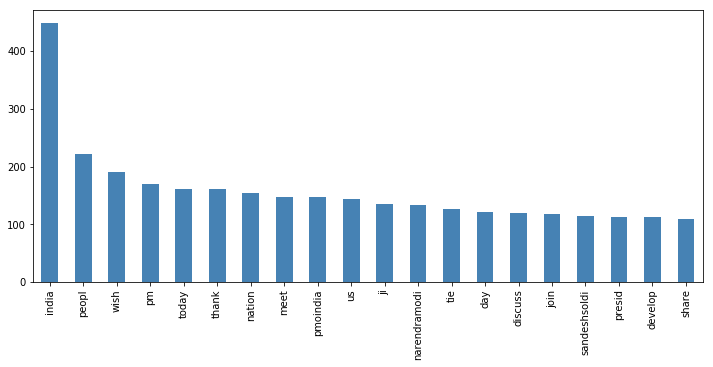

In [162]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(color='steelblue',figsize=(12,5))

### Bigrams

In [163]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5, ngram_range=(2,2)) #we can provide min_df parameter for reducing no column, min_df for term less than 5 drop them
vectorizer.fit(docs_clean)              #(2,2) are Bigrams combination of two words toghether will come 
dtm = vectorizer.transform(docs_clean)
dtm #33409 are non zero values

<3220x384 sparse matrix of type '<class 'numpy.int64'>'
	with 3514 stored elements in Compressed Sparse Row format>

In [164]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns=vectorizer.get_feature_names())
df_dtm

,across india,across world,address public,advani ji,adventur awarde,air forc,al nahyan,almighti bless,alway rememb,alway work,...,work toward,work welfar,world leader,xi jinp,year come,yoga day,yogaday celebr,yogaday http,young friend,zay al
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


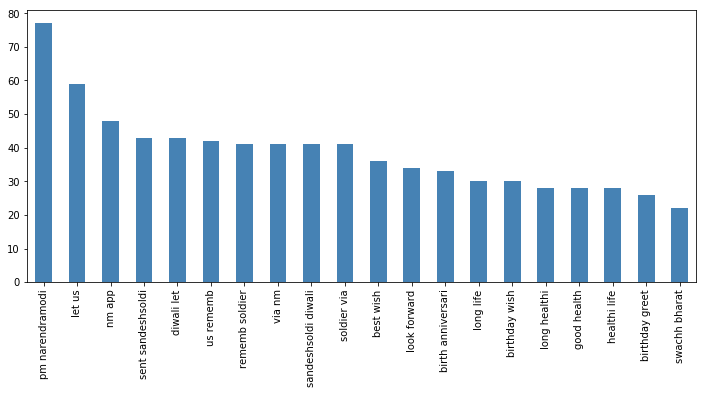

In [165]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(color='steelblue',figsize=(12,5))

# Document Classification

In [3]:
imdb = pd.read_csv('imdb_sentiment.csv')
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
docs = imdb['review'].str.lower().str.replace('[^a-z ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend([])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)

from sklearn.model_selection import train_test_split
train, test = train_test_split(docs_clean,test_size=0.2,random_state=100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(train)
dtm_train = vectorizer.transform(train)
dtm_test = vectorizer.transform(test)

features = vectorizer.get_feature_names()
df_dtm_train = pd.DataFrame(dtm_train.toarray(),columns=features)
df_dtm_test = pd.DataFrame(dtm_test.toarray(),columns=features)
df_dtm_train.shape, df_dtm_test.shape




((598, 2083), (150, 2083))

In [5]:
train_y = imdb.iloc[train.index]['sentiment']
test_y = imdb.iloc[test.index]['sentiment']

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clfr = RandomForestClassifier(random_state=100,n_estimators=300)
rf_clfr.fit(df_dtm_train,train_y)
pred_class = rf_clfr.predict(df_dtm_test) #For balanced class we use accuracy, for imbalanced class AUC, F-Score
accuracy_score(test_y,pred_class)



0.7

In [7]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
rf_clfr = GaussianNB()
rf_clfr.fit(df_dtm_train,train_y)
pred_class = rf_clfr.predict(df_dtm_test) #For balanced class we use accuracy, for imbalanced class AUC, F-Score
accuracy_score(test_y,pred_class)

0.5933333333333334

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
model = AdaBoostClassifier()
model.fit(df_dtm_train, train_y)
pred_class = model.predict(df_dtm_test)
accuracy_score(test_y,pred_class)

0.72

In [9]:
df_dtm_train.sum().sort_values().tail(1)

movi    165
dtype: int64

In [10]:
df_dtm_train['movi'].plot.hist()

In [11]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB #Dependent of the input data we have we use the variant of Naive Bayes
rf_clfr = MultinomialNB() #It performs bettter because Multinomial Naive Bayes, For text data it performs better
rf_clfr.fit(df_dtm_train,train_y)
pred_class = rf_clfr.predict(df_dtm_test) #For balanced class we use accuracy, for imbalanced class AUC, F-Score
accuracy_score(test_y,pred_class)

0.7733333333333333

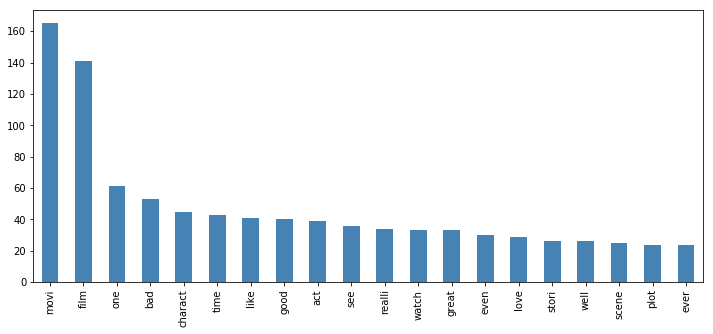

In [12]:
%matplotlib inline
df_dtm_train.sum().sort_values(ascending=False).head(20).plot.bar(color='steelblue',figsize=(12,5))

## TF-IDF Vectorization 

Term Frequency - Inverse Document Frequency - Helps to reduce the weights to terms which appears across all the documents

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(train)
dtm_train = vectorizer.transform(train)
dtm_test = vectorizer.transform(test)

features = vectorizer.get_feature_names()
df_dtm_train = pd.DataFrame(dtm_train.toarray(),columns=features)
df_dtm_test = pd.DataFrame(dtm_test.toarray(),columns=features)
df_dtm_train.shape, df_dtm_test.shape


train_y = imdb.iloc[train.index]['sentiment']
test_y = imdb.iloc[test.index]['sentiment']

In [14]:
from sklearn.metrics import accuracy_score
rf_clfr = RandomForestClassifier(random_state=100,n_estimators=300)
rf_clfr.fit(df_dtm_train,train_y)
pred_class = rf_clfr.predict(df_dtm_test) #For balanced class we use accuracy, for imbalanced class AUC, F-Score
accuracy_score(test_y,pred_class)


0.7

In [15]:
rf_clfr = MultinomialNB() #It performs bettter because Multinomial Naive Bayes, For text data it performs better
rf_clfr.fit(df_dtm_train,train_y)
pred_class = rf_clfr.predict(df_dtm_test) #For balanced class we use accuracy, for imbalanced class AUC, F-Score
accuracy_score(test_y,pred_class)

0.8

In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(train_x, train_y)
test_y_pred = model.predict(test_x)

NameError: name 'train_x' is not defined

In [ ]:
# docs = imdb['review'].str.lower().str.replace('[^a-z ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend([])
stopwords = []
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)

# Quora Classification

- Check whether it is balanced class or imbalanced class 
- Create whether cloud seprately for sincere and insincere questions
- Clean the data 
- Train = 70%, test = 30% 
- Create DTM (set min_df = 50) 
- create Random Forest Model to predict insincere question 
- Report F1 score 

- 0 is sinsere, 1 is insincere 